<a href="https://colab.research.google.com/github/Emily5-3/NCAA-Analysis-Project/blob/main/NCAA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Sam Ocon, Emily Goldstein, Sebastian Bucknor, and Owen White

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [ ]:
ncaa = pd.read_csv("/content/2018RES_File1-DINationalAggregationOverall (1).txt")

##Introduction

We have been hired by a college that is looking at the graduation rates of its student athletes. They have been looking at their financials, and they are realizing that it might be a good idea to cut some teams to lower student aid costs. However, they don't want to affect the graduation rate of their school overall, since that is an important statistic that prospective students look at. They want to know how the graduation rates of all their student athletes compare to the graduation rates of their NCAA Division 1 athletes so they know if it's a good idea to cut some times.


We are using a data set from the NCAA official website to look at graduation rates. This data was collected by the NCAA from the universities that are affiliated with them.

##Background Processing

In [ ]:
ncaa.head()

,SPORT_CODE,DATATAB_FED_RATE,FED_RATE_2011,FED_RATE_2010,FED_RATE_2009,FED_RATE_2008,FED_RATE_2007,FED_RATE_2006,FED_RATE_2005,FED_RATE_2004,...,GSR_DEN_2004,GSR_DEN_2003,GSR_DEN_2002,GSR_DEN_2001,GSR_DEN_2000,GSR_DEN_1999,GSR_DEN_1998,GSR_DEN_1997,GSR_DEN_1996,GSR_DEN_1995
0,MBA,NaN,52.0,52.0,51.0,49.0,51.0,49.0,50.0,48.0,...,1933.0,1950.0,1865.0,1817.0,1761.0,1794.0,1808.0,1741.0,1691.0,1625.03
1,MBB,NaN,46.0,48.0,46.0,47.0,48.0,46.0,48.0,46.0,...,1033.0,1076.0,974.0,982.0,1041.0,1080.0,1008.0,1033.0,1051.0,1062.00
2,MFB,NaN,62.0,61.0,60.0,60.0,60.0,59.0,58.0,57.0,...,4360.0,4313.0,3961.0,3941.0,4012.0,4260.0,3964.0,4005.0,3998.0,4173.00
3,MFE,NaN,80.0,77.0,69.0,69.0,65.0,42.0,83.0,67.0,...,47.0,15.0,19.0,19.0,13.0,18.0,20.0,15.0,17.0,4.00
4,MGO,NaN,71.0,68.0,67.0,67.0,68.0,67.0,66.0,65.0,...,541.0,547.0,544.0,533.0,502.0,521.0,509.0,516.0,501.0,493.00


In [ ]:
ncaa.columns

Index(['SPORT_CODE', 'DATATAB_FED_RATE', 'FED_RATE_2011', 'FED_RATE_2010',
       'FED_RATE_2009', 'FED_RATE_2008', 'FED_RATE_2007', 'FED_RATE_2006',
       'FED_RATE_2005', 'FED_RATE_2004',
       ...
       'GSR_DEN_2004', 'GSR_DEN_2003', 'GSR_DEN_2002', 'GSR_DEN_2001',
       'GSR_DEN_2000', 'GSR_DEN_1999', 'GSR_DEN_1998', 'GSR_DEN_1997',
       'GSR_DEN_1996', 'GSR_DEN_1995'],
      dtype='object', length=109)

There are a lot of columns and variables in this data set. `SPORT_CODE` means the **type of sport** that the date is associated with. For example, `MBA` means baseball.

`FED_RATE`, or the **federal graduation rate**, measures how many students receiving athletic scholarship graduate in their given cohort year.  `GSR` is the **graduation success rate**, specifically for student athletes on NCAA Divison I teams. Both are *numerical*.

These rates were calculated by didviding the number of students that graduated by the number of students enrolled in each cohort and classifcation. For example, `GSR_2002` was calculated by dividing `GSR_NUM_2002` by `GSR_DEN_2002`. Both are *numerical*.

In [ ]:
null_columns = ncaa.columns[ncaa.isnull().all()]
null_columns

Index(['DATATAB_FED_RATE', 'DATATAB_GSR', 'DATATAB_FED_NUMERATOR',
       'DATATAB_FED_DENOMINATOR', 'DATATAB_GSR_NUMBERATOR',
       'DATATAB_GSR_DENOMINATOR'],
      dtype='object')

Looking at the dataset there are six columns that do not have any data. We decided to **drop these columns**. We also decided to drop the numerator and denominator columns, since we're only worried about the rates themselves.

In [ ]:
ncaa_clean = ncaa.drop(columns = ['DATATAB_FED_RATE', 'DATATAB_GSR', 'DATATAB_FED_NUMERATOR', 'DATATAB_FED_DENOMINATOR', 'DATATAB_GSR_NUMBERATOR', 'DATATAB_GSR_DENOMINATOR'])
ncaa_clean.head()

,SPORT_CODE,FED_RATE_2011,FED_RATE_2010,FED_RATE_2009,FED_RATE_2008,FED_RATE_2007,FED_RATE_2006,FED_RATE_2005,FED_RATE_2004,FED_RATE_2003,...,GSR_DEN_2004,GSR_DEN_2003,GSR_DEN_2002,GSR_DEN_2001,GSR_DEN_2000,GSR_DEN_1999,GSR_DEN_1998,GSR_DEN_1997,GSR_DEN_1996,GSR_DEN_1995
0,MBA,52.0,52.0,51.0,49.0,51.0,49.0,50.0,48.0,46.0,...,1933.0,1950.0,1865.0,1817.0,1761.0,1794.0,1808.0,1741.0,1691.0,1625.03
1,MBB,46.0,48.0,46.0,47.0,48.0,46.0,48.0,46.0,47.0,...,1033.0,1076.0,974.0,982.0,1041.0,1080.0,1008.0,1033.0,1051.0,1062.00
2,MFB,62.0,61.0,60.0,60.0,60.0,59.0,58.0,57.0,54.0,...,4360.0,4313.0,3961.0,3941.0,4012.0,4260.0,3964.0,4005.0,3998.0,4173.00
3,MFE,80.0,77.0,69.0,69.0,65.0,42.0,83.0,67.0,100.0,...,47.0,15.0,19.0,19.0,13.0,18.0,20.0,15.0,17.0,4.00
4,MGO,71.0,68.0,67.0,67.0,68.0,67.0,66.0,65.0,69.0,...,541.0,547.0,544.0,533.0,502.0,521.0,509.0,516.0,501.0,493.00


Next, we'll check for any **missing data** in our data set.

In [ ]:
ncaa_clean.isnull().values.any()

np.True_

It looks like we do have missing data. Let's **drop** them.

In [ ]:
ncaa_clean=ncaa_clean.dropna()
ncaa_clean.head()

,SPORT_CODE,FED_RATE_2011,FED_RATE_2010,FED_RATE_2009,FED_RATE_2008,FED_RATE_2007,FED_RATE_2006,FED_RATE_2005,FED_RATE_2004,FED_RATE_2003,...,GSR_DEN_2004,GSR_DEN_2003,GSR_DEN_2002,GSR_DEN_2001,GSR_DEN_2000,GSR_DEN_1999,GSR_DEN_1998,GSR_DEN_1997,GSR_DEN_1996,GSR_DEN_1995
0,MBA,52.0,52.0,51.0,49.0,51.0,49.0,50.0,48.0,46.0,...,1933.0,1950.0,1865.0,1817.0,1761.0,1794.0,1808.0,1741.0,1691.0,1625.03
1,MBB,46.0,48.0,46.0,47.0,48.0,46.0,48.0,46.0,47.0,...,1033.0,1076.0,974.0,982.0,1041.0,1080.0,1008.0,1033.0,1051.0,1062.00
2,MFB,62.0,61.0,60.0,60.0,60.0,59.0,58.0,57.0,54.0,...,4360.0,4313.0,3961.0,3941.0,4012.0,4260.0,3964.0,4005.0,3998.0,4173.00
4,MGO,71.0,68.0,67.0,67.0,68.0,67.0,66.0,65.0,69.0,...,541.0,547.0,544.0,533.0,502.0,521.0,509.0,516.0,501.0,493.00
5,MGY,91.0,87.0,92.0,80.0,83.0,88.0,88.0,88.0,88.0,...,51.0,38.0,42.0,40.0,43.0,43.0,49.0,41.0,51.0,55.00


In [ ]:
ncaa_clean.isnull().values.any()

np.False_

Since we're only interested in the **graduation rates** and the **sport code**, we decided to include only those variables in our cleaned data set.

In [ ]:
ncaa_clean = ncaa_clean[['SPORT_CODE', 'FED_RATE_2011', 'FED_RATE_2010', 'FED_RATE_2009',
       'FED_RATE_2008', 'FED_RATE_2007', 'FED_RATE_2006', 'FED_RATE_2005',
       'FED_RATE_2004', 'FED_RATE_2003', 'FED_RATE_2002', 'FED_RATE_2001',
       'FED_RATE_2000', 'FED_RATE_1999', 'FED_RATE_1998', 'FED_RATE_1997',
       'FED_RATE_1996', 'FED_RATE_1995', 'GSR_2011', 'GSR_2010', 'GSR_2009',
       'GSR_2008', 'GSR_2007', 'GSR_2006', 'GSR_2005', 'GSR_2004', 'GSR_2003',
       'GSR_2002', 'GSR_2001', 'GSR_2000', 'GSR_1999', 'GSR_1998', 'GSR_1997',
       'GSR_1996', 'GSR_1995']]

In [ ]:
ncaa_clean.columns

Index(['SPORT_CODE', 'FED_RATE_2011', 'FED_RATE_2010', 'FED_RATE_2009',
       'FED_RATE_2008', 'FED_RATE_2007', 'FED_RATE_2006', 'FED_RATE_2005',
       'FED_RATE_2004', 'FED_RATE_2003', 'FED_RATE_2002', 'FED_RATE_2001',
       'FED_RATE_2000', 'FED_RATE_1999', 'FED_RATE_1998', 'FED_RATE_1997',
       'FED_RATE_1996', 'FED_RATE_1995', 'GSR_2011', 'GSR_2010', 'GSR_2009',
       'GSR_2008', 'GSR_2007', 'GSR_2006', 'GSR_2005', 'GSR_2004', 'GSR_2003',
       'GSR_2002', 'GSR_2001', 'GSR_2000', 'GSR_1999', 'GSR_1998', 'GSR_1997',
       'GSR_1996', 'GSR_1995'],
      dtype='object')

##Checkpoint 2 - List of Research Questions and Methods


**Question 1**: How has the federal graduation rate in men's college baseball changed from 2004 to 2011?

**Question 2**: Can we predict the federal graduation rate in baseball for the next year using our data?

**Question 3**: Which sport had the greatest impact on average graduation success rate in 2011?

**Question 4**: How do graduation success rates differ between male and female teams of the same sport?

##Checkpoint 3- Preliminary Analysis

After looking at the data we saw that the federal graduation rate in Baseball and Basketball was fairly low. We decided to focus on baseball because the rates have seemingly shown improvement and have broken the 50% graduation mark in recent years.

**Question 1**: How has the federal graduation rate in men's college baseball changed from 2004 to 2011?

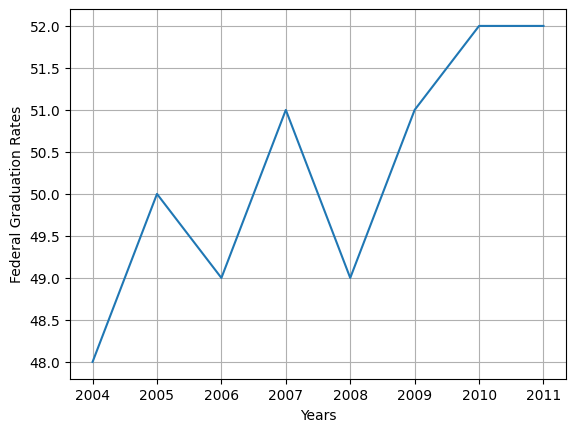

In [ ]:
baseball = ncaa_clean[ncaa_clean["SPORT_CODE"]== "MBA"]
years = [2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011]
grad_rates = [
    baseball['FED_RATE_2004'].values[0],
    baseball['FED_RATE_2005'].values[0],
    baseball['FED_RATE_2006'].values[0],
    baseball['FED_RATE_2007'].values[0],
    baseball['FED_RATE_2008'].values[0],
    baseball['FED_RATE_2009'].values[0],
    baseball['FED_RATE_2010'].values[0],
    baseball['FED_RATE_2011'].values[0]
]

sns.lineplot(x = years ,y= grad_rates)
plt.ylabel("Federal Graduation Rates")
plt.xlabel("Years")
plt.grid()
plt.show()

In [ ]:
rate_2004 = baseball["FED_RATE_2004"].values[0]
rate_2011 = baseball['FED_RATE_2011'].values[0]

rate_change = ((rate_2011 - rate_2004) / rate_2004) * 100
print(f"The percent change in Federal Graduation Rates from 2004 to 2011 in baseball is {rate_change:.2f}%")

The percent change in Federal Graduation Rates from 2004 to 2011 in baseball is 8.33%


The federal graduation rate in Men’s College Baseball has changed 4% from 2004 to 2011. Our analysis of our research question was effective as there is a clear change in the federal graduation rate in Men’s College Baseball from 2004 to 2011. There is nothing significant missing from the dataset that could change the answer to our question, but it would be interesting to do a more in-depth analysis of federal graduation rate for specific colleges or conferences.

**Question 2**: Can we predict the federal graduation rate in baseball for the next year using our data?

In [ ]:
x = years
y = grad_rates

In [ ]:
x = sm.tools.tools.add_constant(x)

model = sm.OLS(y, x).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.624
Method:                 Least Squares   F-statistic:                     12.60
Date:                Wed, 14 May 2025   Prob (F-statistic):             0.0121
Time:                        17:08:47   Log-Likelihood:                -9.4715
No. Observations:                   8   AIC:                             22.94
Df Residuals:                       6   BIC:                             23.10
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -953.5000    282.775     -3.372      0.0

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=8 observations were given.
  return hypotest_fun_in(*args, **kwds)


Yes, the data was used to fit a linear regression model, which allows for prediction. The model produced an R-squared of 0.677, indicating that approximately 67.7% of the variation in graduation rates can be explained by the year. The p-value of 0.012 indicates a statistically significant trend between time and graduation rates in college men's baseball.

**Question 3**: Which sport had the greatest impact on average graduation success rate in 2011?

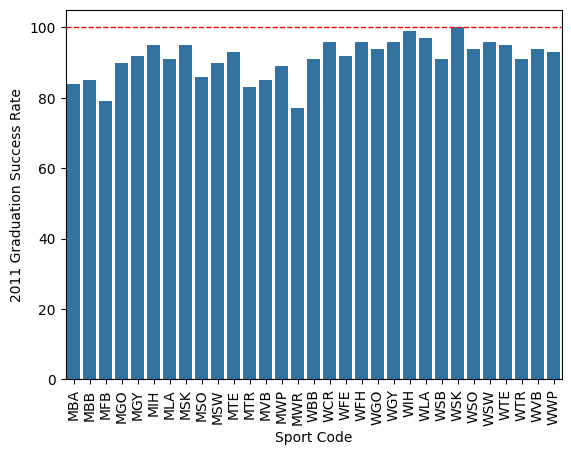

In [ ]:
sns.barplot(ncaa_clean, x = "SPORT_CODE", y = "GSR_2011")
plt.ylabel("2011 Graduation Success Rate")
plt.xlabel("Sport Code")
plt.xticks(rotation=90)
plt.axhline(100, color='red', linestyle='--', linewidth=1)
plt.show()

In [ ]:
gsr_2011_by_sport = ncaa_clean.groupby("SPORT_CODE")["GSR_2011"].mean()
highest_gsr = gsr_2011_by_sport.idxmax()
value = gsr_2011_by_sport.max()

print(f"The sport with the higest average GSR in 2011 is {highest_gsr} with a GSR of {value:.2f}%")

The sport with the higest average GSR in 2011 is WSK with a GSR of 100.00%


According to the NCAA, Women’s Skiing, WSK, had the highest average graduation success rate in 2011. This could be because not many schools have a women’s skiing program meaning the total number of athletes in this sport is small, resulting in a higher GSR.


**Question 4**: How do graduation success rates differ between male and female teams of the same sport?

In [ ]:
sports_of_interest = ['MBB', 'WBB', 'MGO', 'WGO', 'MGY', 'WGY', 'MIH', 'WIH', 'MLA', 'WLA',
                      'MSK', 'WSK', 'MSO', 'WSO', 'MSW', 'WSW', 'MTE', 'WTE',
                      'MTR', 'WTR', 'MVB', 'WVB', 'MWP', 'WWP'
                      ]

selected_data = ncaa_clean[ncaa_clean['SPORT_CODE'].isin(sports_of_interest)].copy()
sex_list = []

for code in selected_data['SPORT_CODE']:
    if code.startswith('M'):
        sex_list.append('M')
    else:
        sex_list.append('F')

selected_data['SEX'] = sex_list

In [ ]:
sex_code = []
for sex in selected_data["SEX"]:
    if sex == "M":
        sex_code.append(0)
    else:
        sex_code.append(1)

selected_data["SEX_CODE"] = sex_code

In [ ]:
X = selected_data[["SEX_CODE"]]
X = sm.add_constant(X)
y = selected_data["GSR_2011"]

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               GSR_2011   R-squared:                       0.408
Model:                            OLS   Adj. R-squared:                  0.381
Method:                 Least Squares   F-statistic:                     15.18
Date:                Wed, 14 May 2025   Prob (F-statistic):           0.000776
Time:                        17:08:56   Log-Likelihood:                -62.784
No. Observations:                  24   AIC:                             129.6
Df Residuals:                      22   BIC:                             131.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         89.5000      0.998     89.670      0.0

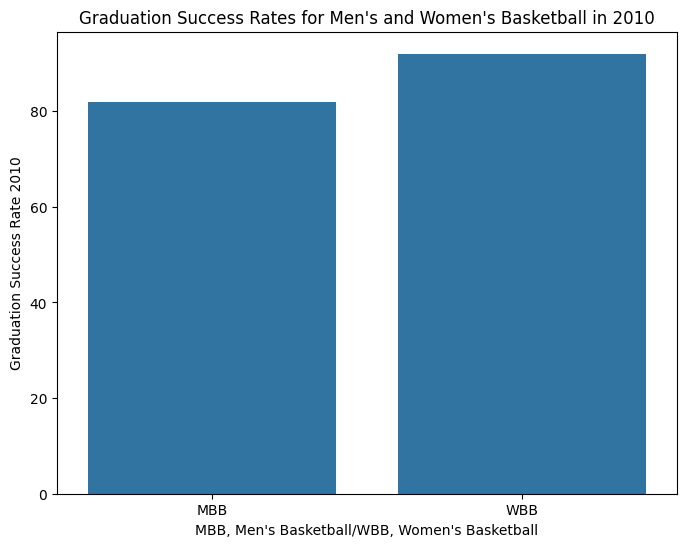

In [ ]:
basketball_gsr_2010 = ncaa_clean[ncaa_clean["SPORT_CODE"].isin(["MBB", "WBB"])]
basketball_gsr_2010 = basketball_gsr_2010[["SPORT_CODE", "GSR_2010"]]
plt.figure(figsize=(8,6))
sns.barplot(basketball_gsr_2010, x="SPORT_CODE", y="GSR_2010")
plt.ylabel("Graduation Success Rate 2010")
plt.xlabel("MBB, Men's Basketball/WBB, Women's Basketball")
plt.title("Graduation Success Rates for Men's and Women's Basketball in 2010")
plt.show()

The constant of 89.5 represents the average graduation rate for male sports. The SEX_CODE coefficient of 5.5 indicates that, on average, the female equivalent sport is expected to have a graduation rate 5.5 percentage points higher than that of the male counterpart. With a p-value of 0.001, gender appears to be a statistically significant factor when comparing graduation rates between men's and women's teams. The R-squared value of 0.408 means that approximately 40.8% of the variance in graduation rates can be explained by gender.

## Conclusion

We recommend that the college does not cut the baseball team, as the graduation rate has visibly increased from 2004 to 2011. Even though the women’s skiing team is rather small, they have the greatest impact on a high graduation rate, so we recommend that they stay as well. If we want to look over this data in the future, we should focus on potentially cutting some male teams, as the female teams graduation rate is generally higher. However, an overall analysis of our athletics data indicates the school should look at other departments for budget cuts.